In [126]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
import tensorflow.keras
import pygad.kerasga

dataTrainingAwal = pd.read_csv("DataKomplit.csv")
dataTrainingAwal.head()
data_outputs = dataTrainingAwal.loc[:,["target"]]
data_inputs = dataTrainingAwal.drop(labels =['target','ID','FLTID','STA','STD','AC','DATOP'],axis=1)

display(dataTrainingAwal)
display(data_inputs)
display(data_outputs)

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target
0,train_id_0,1/3/2016,TU 0712,CMN,TUN,1/3/2016 10:30,2016-01-03 12.55.00,ATA,TU 32AIMN,Severe
1,train_id_1,1/13/2016,TU 0757,MXP,TUN,1/13/2016 15:05,2016-01-13 16.55.00,ATA,TU 31BIMO,Common
2,train_id_2,1/16/2016,TU 0214,TUN,IST,1/16/2016 4:10,2016-01-16 06.45.00,ATA,TU 32AIMN,ONTIME
3,train_id_3,1/17/2016,TU 0480,DJE,NTE,1/17/2016 14:10,2016-01-17 17.00.00,ATA,TU 736IOK,ONTIME
4,train_id_4,1/17/2016,TU 0338,TUN,ALG,1/17/2016 14:30,2016-01-17 15.50.00,ATA,TU 320IMU,Common
...,...,...,...,...,...,...,...,...,...,...
9995,train_id_9995,2/20/2016,TU 0647,FRA,DJE,2/20/2016 19:10,2016-02-20 22.00.00,ATA,TU 736IOQ,Medium
9996,train_id_9996,2/20/2016,TU 0875,GVA,TUN,2/20/2016 19:00,2016-02-20 20.55.00,ATA,TU 736IOP,Common
9997,train_id_9997,2/21/2016,TU 0997,NCE,TUN,2/21/2016 10:15,2016-02-21 11.50.00,ATA,TU 320IMR,ONTIME
9998,train_id_9998,2/21/2016,TU 0514,TUN,BCN,2/21/2016 14:05,2016-02-21 15.50.00,ATA,TU 32AIML,ONTIME


,DEPSTN,ARRSTN,STATUS
0,CMN,TUN,ATA
1,MXP,TUN,ATA
2,TUN,IST,ATA
3,DJE,NTE,ATA
4,TUN,ALG,ATA
...,...,...,...
9995,FRA,DJE,ATA
9996,GVA,TUN,ATA
9997,NCE,TUN,ATA
9998,TUN,BCN,ATA


,target
0,Severe
1,Common
2,ONTIME
3,ONTIME
4,Common
...,...
9995,Medium
9996,Common
9997,ONTIME
9998,ONTIME


In [127]:
dataTrainingAwal.columns
dataTrainingAwal.info()
dataTrainingAwal.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      10000 non-null  object
 1   DATOP   10000 non-null  object
 2   FLTID   10000 non-null  object
 3   DEPSTN  10000 non-null  object
 4   ARRSTN  10000 non-null  object
 5   STD     10000 non-null  object
 6   STA     10000 non-null  object
 7   STATUS  10000 non-null  object
 8   AC      10000 non-null  object
 9   target  10000 non-null  object
dtypes: object(10)
memory usage: 781.4+ KB


,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target
count,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
unique,10000,219,718,78,80,8373,8710,5,35,4
top,train_id_0,7/8/2016,TU 0217,TUN,TUN,7/4/2016 14:30,2016-07-04 09.10.00,ATA,TU 320IMU,Common
freq,1,97,123,3702,3787,5,4,9903,503,4017


In [128]:
le = LabelEncoder()

cols = data_inputs.columns.values
for col in cols:
    data_inputs[col] = le.fit_transform(data_inputs[col])
    

data_outputs = le.fit_transform(data_outputs)
    

display(data_inputs.shape)

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(10000, 3)

In [129]:
for col in data_inputs.columns:
#     if data_inputs[col].dtype == 'object':
    print(f'Unique values in column {col}: {data_inputs[col].unique()}')

Unique values in column DEPSTN: [19 48 73 22 69 32 58 44 14  0 74  3 27  6 33  2 39 67 41 61 37  8 51 56
 46 24 65 26 17 54 55 77 30 62 47 68 31 52 50 16  7 75 57 42 72 10 23 35
 11 45  1 38 12 63 40 66 43 15  4 20 21 60 71 29 49 13 59 76 53 70 34 18
 25 28  9  5 64 36]
Unique values in column ARRSTN: [75 32 57  2  6 60 26 53 48 45 27 14 22 43 19  7 63 30 50  8 44 33  0 77
 47 11 67 41 39 17 46 16 24 31 52 79  3 54 72 76 69 49 38 21 59 23 12 70
 42 62 56 10 74  1 78 65 20  4 64 13 29 34 15 58 35 55 68 40 61 25 73 66
 18  5 28 51  9 36 37 71]
Unique values in column STATUS: [0 2 3 4 1]


In [130]:
# for col in data_outputs.columns.values:
# #     if dataTrainingAwal[col].dtype == 'object':
#     print(f'Unique values in column {col}: {data_outputs[col].unique()}')
display(np.unique(data_outputs))

array([0, 1, 2, 3])

In [131]:
input_layer  = tensorflow.keras.layers.Input(3)
dense_layer1 = tensorflow.keras.layers.Dense(5, activation="relu")(input_layer)
dense_layer2 = tensorflow.keras.layers.Dense(3, activation="relu")(dense_layer1)
output_layer = tensorflow.keras.layers.Dense(1, activation="linear")(dense_layer2)

model = tensorflow.keras.Model(inputs=input_layer, outputs=output_layer)

In [132]:
model.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 3)]               0         
                                                                 
 dense_21 (Dense)            (None, 5)                 20        
                                                                 
 dense_22 (Dense)            (None, 3)                 18        
                                                                 
 dense_23 (Dense)            (None, 1)                 4         
                                                                 
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


In [133]:
keras_ga = pygad.kerasga.KerasGA(model=model, num_solutions=10)

In [134]:
def fitness_func(ga_instance, solution, sol_idx):
    global data_inputs, data_outputs, keras_ga, model

    model_weights_matrix = pygad.kerasga.model_weights_as_matrix(model=model,weights_vector=solution)

    model.set_weights(weights=model_weights_matrix)
    
    predictions = model.predict(data_inputs)

    mae = tensorflow.keras.losses.MeanAbsoluteError()
    error = mae(data_outputs, predictions).numpy()

    solution_fitness = 1.0 / (error + 0.00000001)

    return solution_fitness

In [135]:
def on_generation(ga_instance):
    print("Generation = {generation}".format(generation=ga_instance.generations_completed))
    print("Fitness    = {fitness}".format(fitness=ga_instance.best_solution(ga_instance.last_generation_fitness)[1]), end='\n\n')

In [136]:
ga_instance = pygad.GA(num_generations=10, 
                       num_parents_mating=5, 
                       fitness_func=fitness_func,
                       initial_population=keras_ga.population_weights,
                       on_generation=on_generation,
                       suppress_warnings=True)

In [137]:
ga_instance.run()

313/313 [==============================] - 0s 1ms/step
Generation = 1
Fitness    = 0.27279514949951783

313/313 [==============================] - 0s 1ms/step
Generation = 2
Fitness    = 0.3071576898843821

313/313 [==============================] - 1s 2ms/step
Generation = 3
Fitness    = 0.3071576898843821

313/313 [==============================] - 0s 1ms/step
Generation = 4
Fitness    = 0.5278697585031858

313/313 [==============================] - 0s 1ms/step
Generation = 5
Fitness    = 0.8906846557435766

313/313 [==============================] - 0s 1ms/step
Generation = 6
Fitness    = 0.8921168687482367

313/313 [==============================] - 0s 1ms/step
Generation = 7
Fitness    = 0.8921168687482367

313/313 [==============================] - 0s 1ms/step
Generation = 8
Fitness    = 0.9099224608375727

313/313 [==============================] - 1s 4ms/step
Generation = 9
Fitness    = 0.9099224608375727

313/313 [==============================] - 0s 1ms/step
Generation = 10
F

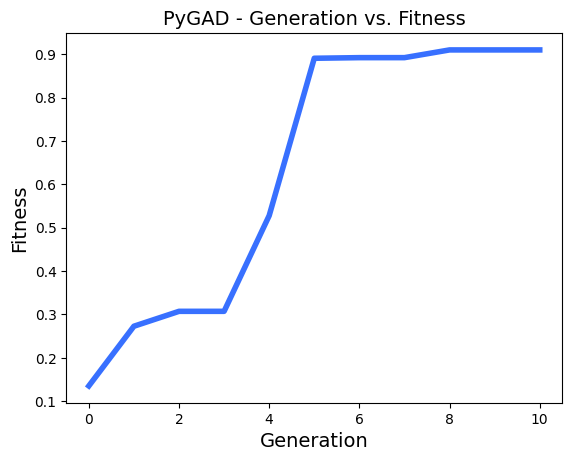

In [138]:
fig = ga_instance.plot_result(linewidth=4)

In [139]:
solution, solution_fitness, _ = ga_instance.best_solution()
print("Parameters of the best solution:\n{solution}".format(solution=solution), end="\n\n")

# This is equation to the number of trainable parameters in the Keras model.
print("Length of the solution is:", len(solution), end='\n\n')

print("Fitness value of the best solution:\n{solution_fitness}".format(solution_fitness=solution_fitness), end='\n\n')

313/313 [==============================] - 1s 2ms/step
Parameters of the best solution:
[ 1.11162641  0.49125828 -1.81643318  0.30524461  0.280254   -1.21675588
 -2.49807228  0.48204174 -1.43420146 -0.40432343 -1.16743181  0.34248714
 -0.45602677 -0.80499163  0.30801562  0.81094405  0.03262134 -0.09366471
 -0.1731987  -0.53271011 -0.20921394 -0.38451036 -0.84446017  0.18423899
 -0.37826905 -0.27416169 -0.40576778 -0.80146988 -0.53987918 -1.13249021
 -1.76088258  0.38632392  0.53381936  0.27961559 -0.15177172 -1.1982153
  1.771049   -0.98615409  2.12038747  0.34719954  2.5103536   0.15165061]

Length of the solution is: 42

Fitness value of the best solution:
0.9099224608375727



In [140]:
best_solution_weights = pygad.kerasga.model_weights_as_matrix(model=model,
                                                              weights_vector=solution)
model.set_weights(best_solution_weights)
predictions = model.predict(data_inputs)
print("Predictions:\n", predictions, end='\n\n')

print("Correct Outputs:\n", data_outputs, end='\n\n')

313/313 [==============================] - 0s 1ms/step
Predictions:
 [[0.33600903]
 [0.766558  ]
 [0.15165061]
 ...
 [0.766558  ]
 [0.15165061]
 [0.766558  ]]

Correct Outputs:
 [3 0 2 ... 2 2 2]



In [141]:
mae = tensorflow.keras.losses.MeanAbsoluteError()
abs_error = mae(data_outputs, predictions).numpy()
print("Absolute Error:\n", abs_error)

Absolute Error:
 1.0989947
